In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<font style = 'font-family:Aparajita'><font size = 6><b>Challenge: Data Cleaning & Validation </b></font>
<p><font style = 'font-family:Aparajita'><font size = 5><i>Unit 1.3 Project 6</i>

### Importing and Analyzing Data

In [38]:
print('\033[0;30;49mImporting data set "WELLCOME_APCspend2013_forThinkful".\n')

# Importing sample data set WELLCOME Trust between 2012 and 2013. 
raw_prices = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', 
                     encoding = 'latin1')
raw_prices.head(3)

Importing data set "WELLCOME_APCspend2013_forThinkful".



,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56


In [39]:
print('\033[0;30;49mDropping column PMID/PMCID as we will be using the Journal title as an ID.\n')

# Creating new data frame without column PMID/PMCID called 'prices'
prices = raw_prices.drop(columns = ['PMID/PMCID'])
prices.head(3)

Dropping column PMID/PMCID as we will be using the Journal title as an ID.



,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56


In [40]:
print('\033[0;30;49mChanging last three column names for easier analysis.\n')

# Renamming columns for easier analysis.
prices = prices.rename(columns = {'COST (£) charged to Wellcome (inc VAT when charged)': 'Cost',
                                          'Journal title': 'Journal',
                                          'Article title' : 'Article'})
prices.head(3)

Changing last three column names for easier analysis.



,Publisher,Journal,Article,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56


In [41]:
print('\033[0;30;49mCleaning spelling errors in column "Journal" of price dataframe.\n')

# Cleaning spelling errors in column "Journal" of price data frame.

prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.upper()
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.strip() 

#Remove punctuation signs
list_punctuation = [':', '.', ',', '-', 'the ']     
for i in np.arange(len(list_punctuation)):
    prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace(list_punctuation[i], '')            

#Remove double spaces
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('  ', ' ')

#Correct 'and'
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('&', 'and')

#'American'
list_american = ['americal','american']
for i in np.arange(len(list_american)):
    prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace(list_american[i], 'am')

#'journal'
list_journal = ['journal', 'joural', 'jounal', 'journal of', 'journal', 'jnl', 'js', 'jounral']
for i in np.arange(len(list_journal)):
    prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace(list_journal[i], 'j') 
    
# Misspellings and different abbrevations
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('bioohysica', 'biophysica')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('clinicla', 'clinical')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('heath', 'health')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('behaviour', 'behavior')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('neuropathol$ ', 'neuropathologica ')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('brt', 'british')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('angewande', 'angewandte')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('molecluar', 'molecular')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('ophthalmology', 'opthalmology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('infect dis', 'infectious diseases')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('sci$', 'science')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('agfents', 'agents')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biinformatics', 'bioinformatics')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('britsh$', 'british')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('child: care, health development', 'child: care, health and development')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('epigentics', 'epigenetics')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('psychiatty', 'psychiatry')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('epidemiol$', 'epidemiology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('epidemology', 'epidemiology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('immunol$', 'immunology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('heptology', 'hepatology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('experiements', 'experiments')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('proceddings', 'proceedings')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biologicial', 'biological')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biologyl', 'biology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('antimicobial', 'antimicrobial')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('angew chems int ed', 'angewandte chemie international edition')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('\(bba\)', '')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biochimica et biophysica acta',  'bba') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biol open', 'biology open') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('biochem j', 'biochemical j')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('public library of science', 'plos')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('plos 1', 'plos one')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('plosone', 'plos one')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('negected', 'neglected')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('nucleic acid research', 'nucleic acids research')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('am j trop med hyg', 'am j of tropical medicine and hygiene')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('am j for clinical nutrition', 'am j of clinical nutrition')  
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta d', 'acta crystallographica section d')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta crystallography d', 'acta crystallographica section d') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta crystallographica section d biological crystallography', 'acta crystallographica section d') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta f', 'acta crystallographica section f')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta crystallographica section f structural biology and crystallization communications', 'acta crystallographica section f')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('acta neuropathologica', 'acta neuropathol') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('cell death differentiation', 'cell death and differentiation') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('child care health development', 'child care health and development')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('clinical infectious diseases', 'clinical infectious disease') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('curr biol', 'current biology') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('current opinions in neurobiology', 'current opinion in neurobiology') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('haematologica\/haematology j    ', 'haematologica') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('human mol genetics online', 'human molecular genetics online') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('international', 'int') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('inyernational', 'int') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j biol chemistry','j biol chem')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j biological chemistry','j biol chem')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of biol chem','j biol chem')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of biological chemistry','j biol chem')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of autism and development disorders', 'j of autism and developmental disorders') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of acquired immune deficiency syndroms \(jaids\)', 'j of acquired immune deficiency syndromes') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of visulaized expermiments', 'j of visualized experiments')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('j of virology', 'j of virol') 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('marten child nutr', 'maternal and child nutrition')                                                 
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('mol bio', 'molecular biology')
prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace('plos ntd','plos neglected tropical diseases')

#pnas
list_pnas = ['pnas \(proceedings of national academy of sciences of united states of america', 
             'pnas usa', 
             'proc natl acad sci u s a', 
             'proceedings of national academy of sciences', 
             'proceedings of national academy of sciences \(pnas\)',
             'proceedings of national academy of sciences of united states of america', 
             'proceedings of national academy of sciences of usa']    
for i in np.arange(len(list_pnas)):
    prices.loc[:,'Journal'] = prices.loc[:,'Journal'].str.replace(list_pnas[i], 'pnas') 

print('Number of Unique Journals:',len(prices.groupby('Journal').count()))
prices.head(5)

Cleaning spelling errors in column "Journal" of price dataframe.

Number of Unique Journals: 886


,Publisher,Journal,Article,Cost
0,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J ORG CHEM,Regioselective opening of myo-inositol orthoes...,£685.88


In [42]:
print('\033[0;30;49mCleaning "Cost" column and removing money symbols and 999999.00 values.\n')

# Cleaning "Cost" column.

# Removing "£" from Cost column.
prices.loc[:,'Cost'] = prices.loc[:,'Cost'].str.replace('£','')

# Removing "$" from Cost column.
prices.loc[:,'Cost'] = prices.loc[:,'Cost'].str.replace('$','')

# Removing 999999.00 value and replacing with NaN.
prices.loc[:,'Cost'] = prices.loc[:,'Cost'].replace('999999.00', np.nan)

# Removing the values in column "Cost" that have nan values.
prices = prices.drop(prices[prices['Cost']== 'nan'].index)

prices.head(3)

Cleaning "Cost" column and removing money symbols and 999999.00 values.



,Publisher,Journal,Article,Cost
0,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,0.00
1,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,2381.04
2,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56


In [43]:
# Converting dtype from object to float.
prices['Cost'] = prices['Cost'].apply(float)

In [44]:
# Dropping empty rows in column 'Cost'.
prices.dropna(subset=['Cost'], inplace=True)

From this boxplot, we can see that there are at least three outliers that are skewing the shape of the dataset.



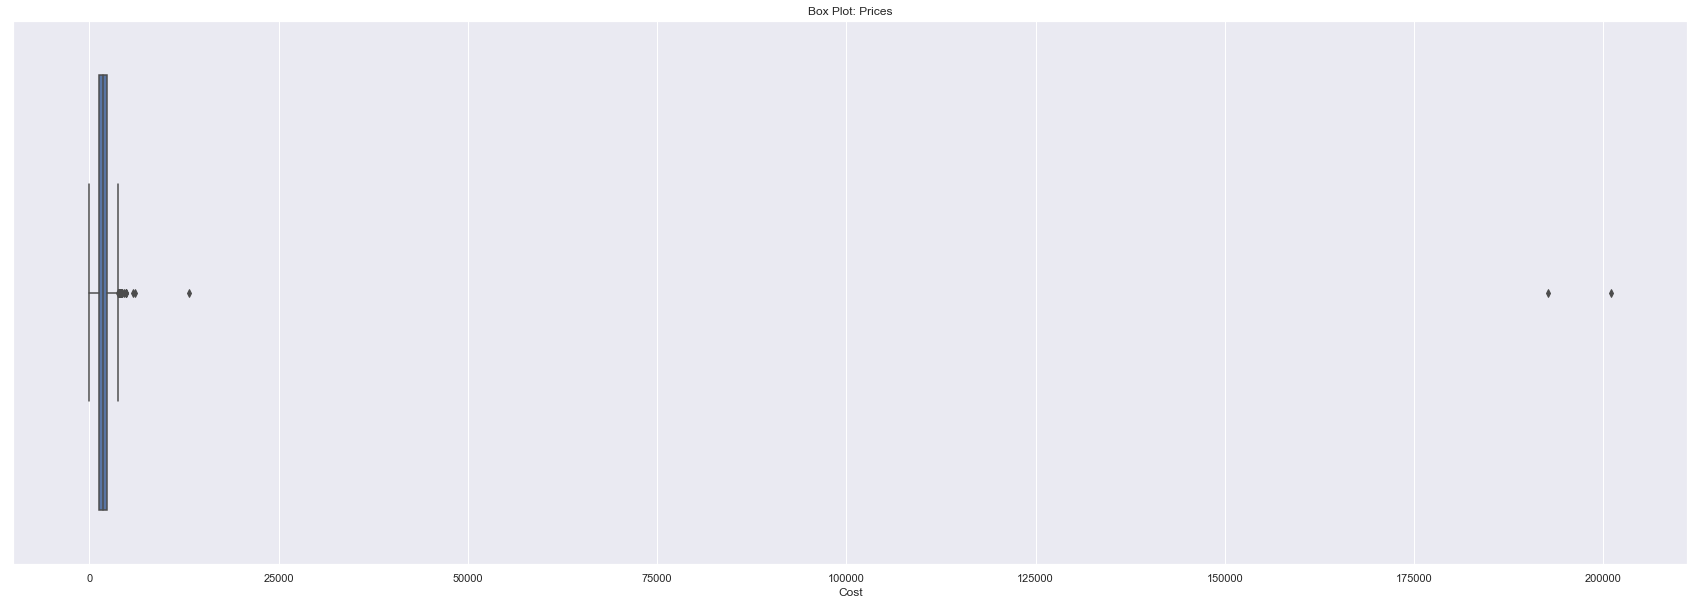

In [45]:
print('\033[0;30;49mFrom this boxplot, we can see that there are at least three outliers that are skewing the shape of the dataset.\n')

# Using seaborne to plot data and find outliers.
figure, ax = plt.subplots(figsize=(30,10))
sns.set(style = 'darkgrid')
sns.boxplot(x=prices['Cost'])
plt.title('Box Plot: Prices')

plt.show()

In [46]:
print('\033[0;30;49mCalculating standard deviation and mean of data set. Then determining upper threshold of data set.\n')

# Calculating standard deviation and mean of data set.
std_price = prices['Cost'].std()
avg_price = prices['Cost'].mean()

# Calculating threshold of data set.
upper_threshold = avg_price + (std_price*.25) # Because the data set had so many outliers, we are only setting the threshold to 25% of the standard deviation above the mean.

# Printing results.
print('Standard Deviation:',std_price)
print('Mean:',avg_price)
print('Upper threshold for outlier:', upper_threshold)

Calculating standard deviation and mean of data set. Then determining upper threshold of data set.

Standard Deviation: 6100.422955877218
Mean: 2015.038038461542
Upper threshold for outlier: 3540.1437774308465


In [47]:
print('\033[0;30;49mUsing calculated upper threshold value to create new column with values "True" if Cost value is an outlier and "False" if it is not.\n')

#Creating an empty column for outlier information.
prices['Outlier'] = None

# Iterate over rows
for idx, row in prices.iterrows():
    # Update the 'Outlier' column with True if the cost is higher than the threshold value.
    if row['Cost'] > upper_threshold :
        prices.loc[idx, 'Outlier'] = True
    else:
        prices.loc[idx, 'Outlier'] = False
prices.head(3)

Using calculated upper threshold value to create new column with values "True" if Cost value is an outlier and "False" if it is not.



,Publisher,Journal,Article,Cost,Outlier
0,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,0.00,False
1,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,2381.04,False
2,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,False


In [61]:
print('\033[0;30;49mDropping "True" values in Outlier column and creating new data frame new_price.\n')

new_price = prices[prices['Outlier'] == False]
new_price.head(3)

Dropping "True" values in Outlier column and creating new data frame new_price.



,Publisher,Journal,Article,Cost,Outlier
0,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,0.00,False
1,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,2381.04,False
2,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,False


Removeed most outliers. New Standard Deviation is:
 638.3288737945411


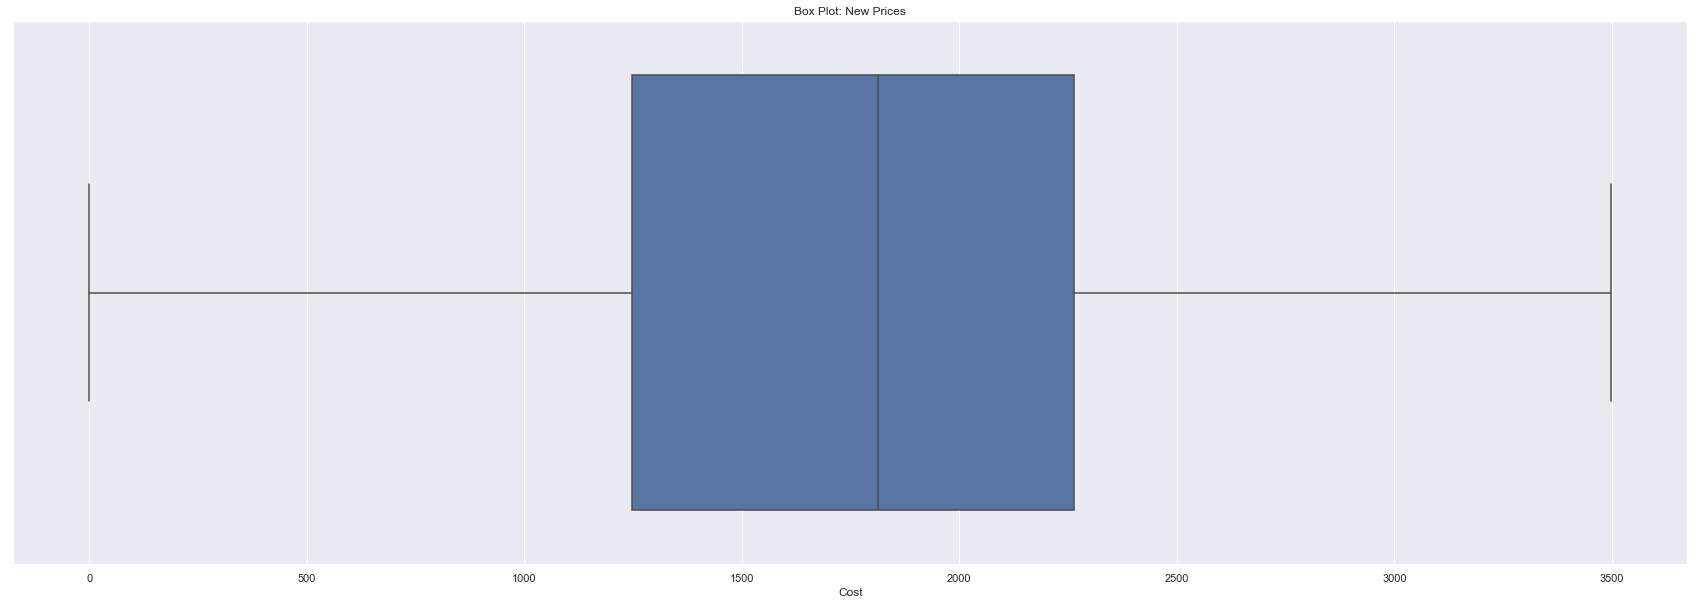

In [62]:
print('\033[0;30;49mRemoveed most outliers. New Standard Deviation is:\n', std_price)

# Using seaborne to plot data and find outliers.
figure, ax = plt.subplots(figsize=(30,10))
sns.set(style = 'darkgrid')

std_price = new_price['Cost'].std()

# Creating boxplot.
sns.boxplot(x = new_price['Cost'])
plt.title('Box Plot: New Prices')
plt.show()

### Challenge

<font style = 'font-family:Aparajita'><font size = 4> 1. Determine the five most common journals and the total articles for each.

In [51]:
print('\033[0;30;49mBelow are the top five most common journals and the total number of articles for each:\n')

count_journal = new_price['Journal'].value_counts()
count_journal.head(5)

Below are the top five most common journals and the total number of articles for each:



PLOS ONE                           183
JOURNAL OF BIOLOGICAL CHEMISTRY     52
NEUROIMAGE                          29
NUCLEIC ACIDS RESEARCH              26
PLOS GENETICS                       22
Name: Journal, dtype: int64

<font style = 'font-family:Aparajita'><font size = 4> 2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

<font style = 'font-family:Aparajita'><font size = 3><i>Information for original data:</i>

In [52]:
std_raw = prices['Cost'].std()
mean_raw = prices['Cost'].mean()
median_raw = prices['Cost'].median()

# Printing results.
print('Standard deviation of original data:',std_raw)
print('Mean of original data:',mean_raw)
print('Median of original data:', median_raw)

Standard deviation of original data: 6100.422955877218
Mean of original data: 2015.038038461542
Median of original data: 1852.505


<font style = 'font-family:Aparajita'><font size = 3><i>Information for scrubbed data:</i>

In [75]:
std = new_price['Cost'].std()
mean = new_price['Cost'].mean()
median = new_price['Cost'].median()

# Printing results.
print('Standard deviation of scrubbed data:',std)
print('Mean of scrubbed data:',mean)
print('Median of scrubbed data:', median)

Standard deviation of scrubbed data: 638.3288737945411
Mean of scrubbed data: 1732.1225087807359
Median of scrubbed data: 1812.89
